In [109]:
def ConvertCountries(item):
    temp = item
    if(item == "KOR"):
        temp = "South Korea"
    if(item == "USA"):
        temp = "United States"
    if(item == "URS"):
        temp = "Soviet Union"
    if(item == "FIN"):
        temp = "Finland"
    if(item == "FRA"):
        temp = "France"
    if(item == "AUS"):
        temp = "Australia"
    if(item == "ITA"):
        temp = "Italy"
    if(item == "UKR"):
        temp = "Ukraine"
    if(item == "CHN"):
        temp = "China"
    if(item == "GBR"):
        temp = "United Kingdom"
    if(item == "JPN"):
        temp = "Japan"
    if(item == "EUN"):
        temp = "Unified Team"
    if(item == "NED"):
        temp = "Netherlands"
    if(item == "RUS"):
        temp = "Russia"
    if(item == "SWE"):
        temp = "Sweden"
    if(item == "CAN"):
        temp = "Canada"
    if(item == "MEX"):
        temp = "Mexico"
    if(item == "GDR"):
        temp = "East Germany"
    if(item == "GER"):
        temp = "Germany"
    if(item == "ROU"):
        temp = "Romania"
    if(item == "BUL"):
        temp = "Bulgaria"
    if(item == "HUN"):
        temp = "Hungary"
    if(item == "ESP"):
        temp = "Spain"
    if(item == "GRE"):
        temp = "Greece"
    if(item == "LAT"):
        temp = "Latvia"
    if(item == "PAK"):
        temp = "Pakistan"
    if(item == "NZL"):
        temp = "New Zealand"
    if(item == "IND"):
        temp = "India"
    if(item == "ZIM"):
        temp = "Zimbabwe"
    if(item == "ARG"):
        temp = "Argentina"
    if(item == "FRG"):
        temp = "West Germany"
    if(item == "TCH"):
        temp = "Czechoslovakia"
    if(item == "BRA"):
        temp = "Brazil"
    if(item == "CUB"):
        temp = "Cuba"
    if(item == "POL"):
        temp = "Poland"
    if(item == "YUG"):
        temp = "Yugoslavia"
    if(item == "SUI"):
        temp = "Switzerland"
    if(item == "PER"):
        temp = "Peru"
    return temp

def readData(data):
    Data = data.readlines()

    gold = {}
    bronze = {}
    silver = {}
    for count,x in enumerate(Data):
        temp = x.split()
        for index,y in enumerate(temp):
            if (y == "Men" or y == "Women"):
                save = index + 1
            if(y == "M" or y == "W"):
                save2 = index + 1
        temp2 = ConvertCountries(temp[save])
        if(temp[save2] == "Gold"):
            if temp2 in gold: gold [temp2] = gold [temp2] + 1
            else:  gold [temp2] = 1
        if(temp[save2] == "Silver"):
            if temp2 in silver: silver [temp2] = silver [temp2] + 1
            else:  silver [temp2] = 1
        if(temp[save2] == "Bronze"):
            if temp2 in bronze: bronze [temp2] = bronze [temp2] + 1
            else:  bronze [temp2] = 1
                
    goldS = sorted (gold.items(), key = operator.itemgetter(1), reverse=True)
    bronzeS = sorted (bronze.items(), key = operator.itemgetter(1), reverse=True)
    silverS = sorted (silver.items(), key = operator.itemgetter(1), reverse=True)
    
    for i in range(0,len(goldS),1):
        print (goldS[i][0]+"\t"+str(goldS[i][1]))
    print("\n")
    for i in range(0,len(bronzeS),1):
        print (bronzeS[i][0]+"\t"+str(bronzeS[i][1]))
    print("\n")
    for i in range(0,len(silverS),1):
        print (silverS[i][0]+"\t"+str(silverS[i][1]))
    print("\n")
    return(goldS,bronzeS,silverS)

archery = open('../data/archery.txt','r')
(goldAS, bronzeAS, silverAS) = readData(archery)

South Korea	6
United States	5
Soviet Union	1
Finland	1
France	1
Australia	1
Italy	1
Ukraine	1
China	1


South Korea	5
Italy	2
Soviet Union	2
United Kingdom	2
Finland	1
Japan	1
Unified Team	1
Ukraine	1
Netherlands	1
Australia	1
Russia	1


South Korea	8
Soviet Union	3
Japan	2
United States	2
China	2
Sweden	1




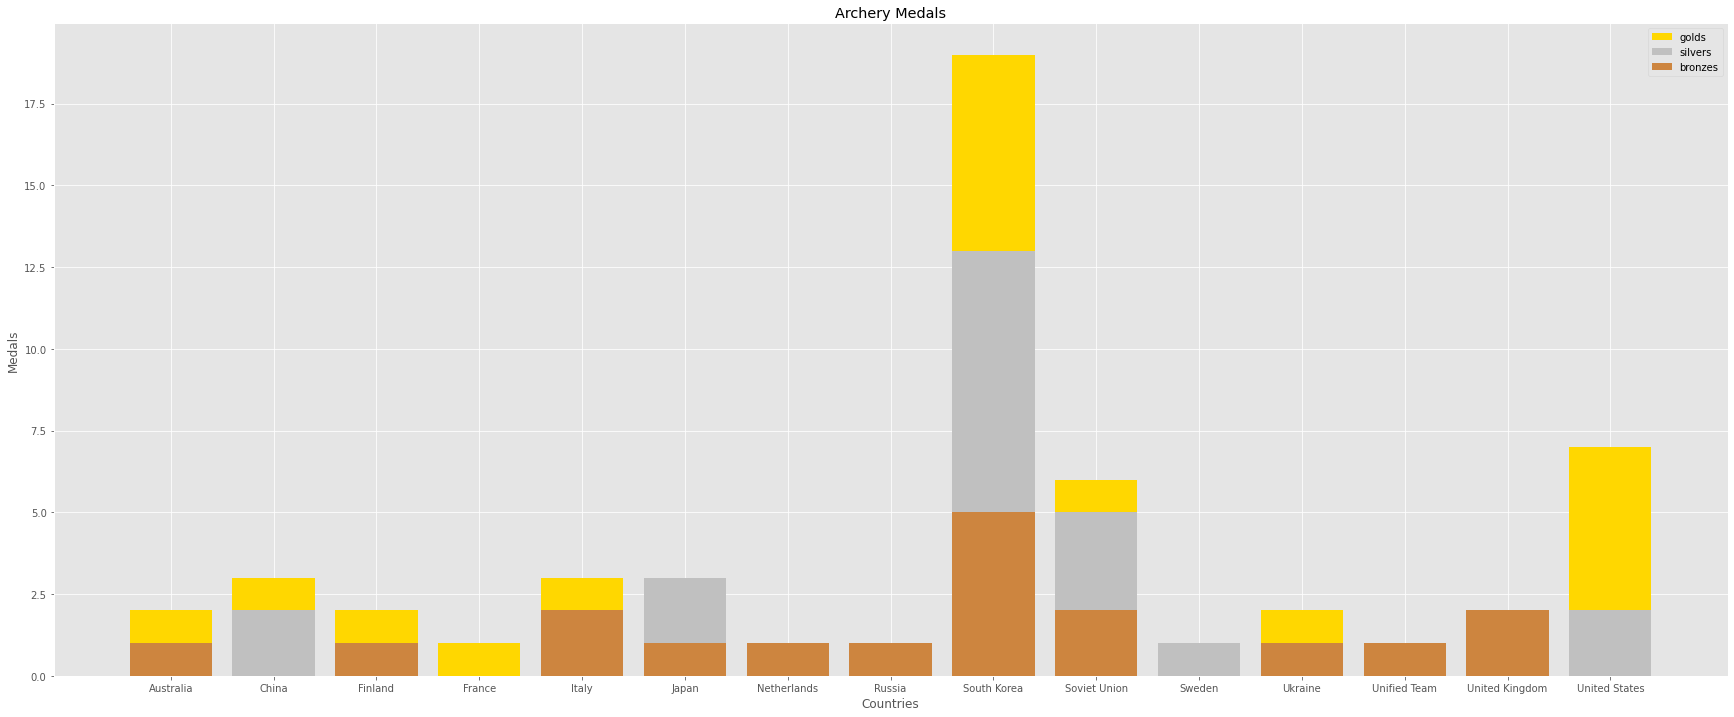

In [209]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

def plotTogetherLists(gold, silver, bronze, title):
    exist = 0
    countries = []
    goldlist = []
    bronzelist = []
    silverlist = []
    for item in gold:
        for test in countries:
            if(test == item[0]):
                exist = 1
        if(exist != 1):
            countries.append(item[0])
        else:
            exist = 0
    for item in silver:
        for test in countries:
            if(test == item[0]):
                exist = 1
        if(exist != 1):
            countries.append(item[0])
        else:
            exist = 0
    for item in bronze:
        for test in countries:
            if(test == item[0]):
                exist = 1
        if(exist != 1):
            countries.append(item[0])
        else:
            exist = 0
            
    countries.sort()    
    
    exist = 0
    for item in countries:
        for test in gold:
            if(test[0] == item):
                goldlist.append(test[1])
                exist = 1
        if(exist != 1):
            goldlist.append(int(0))
        else:
            exist = 0
            
        for test in silver:
            if(test[0] == item):
                silverlist.append(test[1])
                exist = 1
        if(exist != 1):
            silverlist.append(int(0))
        else:
            exist = 0
        
        for test in bronze:
            if(test[0] == item):
                bronzelist.append(test[1])
                exist = 1
        if(exist != 1):
            bronzelist.append(int(0))
        else:
            exist = 0
            
    f = plt.figure (figsize=(30, 12))
    golds = np.array(goldlist)
    bronzes = np.array(bronzelist)
    silvers = np.array(silverlist)
    ind = [x for x, _ in enumerate(countries)]

    plt.bar(ind, golds, width=0.8, label='golds', color='gold', bottom=silvers+bronzes)
    plt.bar(ind, silvers, width=0.8, label='silvers', color='silver', bottom=bronzes)
    plt.bar(ind, bronzes, width=0.8, label='bronzes', color='#CD853F')

    plt.xticks(ind, countries)
    plt.ylabel("Medals")
    plt.xlabel("Countries")
    plt.legend(loc="upper right")
    plt.title(title)

    plt.show()
    
    
    
goldARS = goldAS [ 0:len(goldAS) ] [::-1]
silverARS = silverAS [ 0:len(silverAS) ] [::-1]
bronzeARS = bronzeAS [ 0:len(bronzeAS) ] [::-1]
#plotThreeLists(goldARS,silverARS,bronzeARS, "Archery Medals")
plotTogetherLists(goldARS, silverARS, bronzeARS, "Archery Medals")

In [182]:
diving3 = open('../data/diving3.txt','r')
(goldD3S, bronzeD3S, silverD3S) = readData(diving3)

China	10
United States	5
Soviet Union	2
Canada	1


United States	5
China	3
Russia	3
Germany	2
Soviet Union	1
East Germany	1
Italy	1
Unified Team	1
Canada	1


China	7
East Germany	2
Mexico	2
Russia	2
Canada	2
Italy	1
United States	1
Unified Team	1




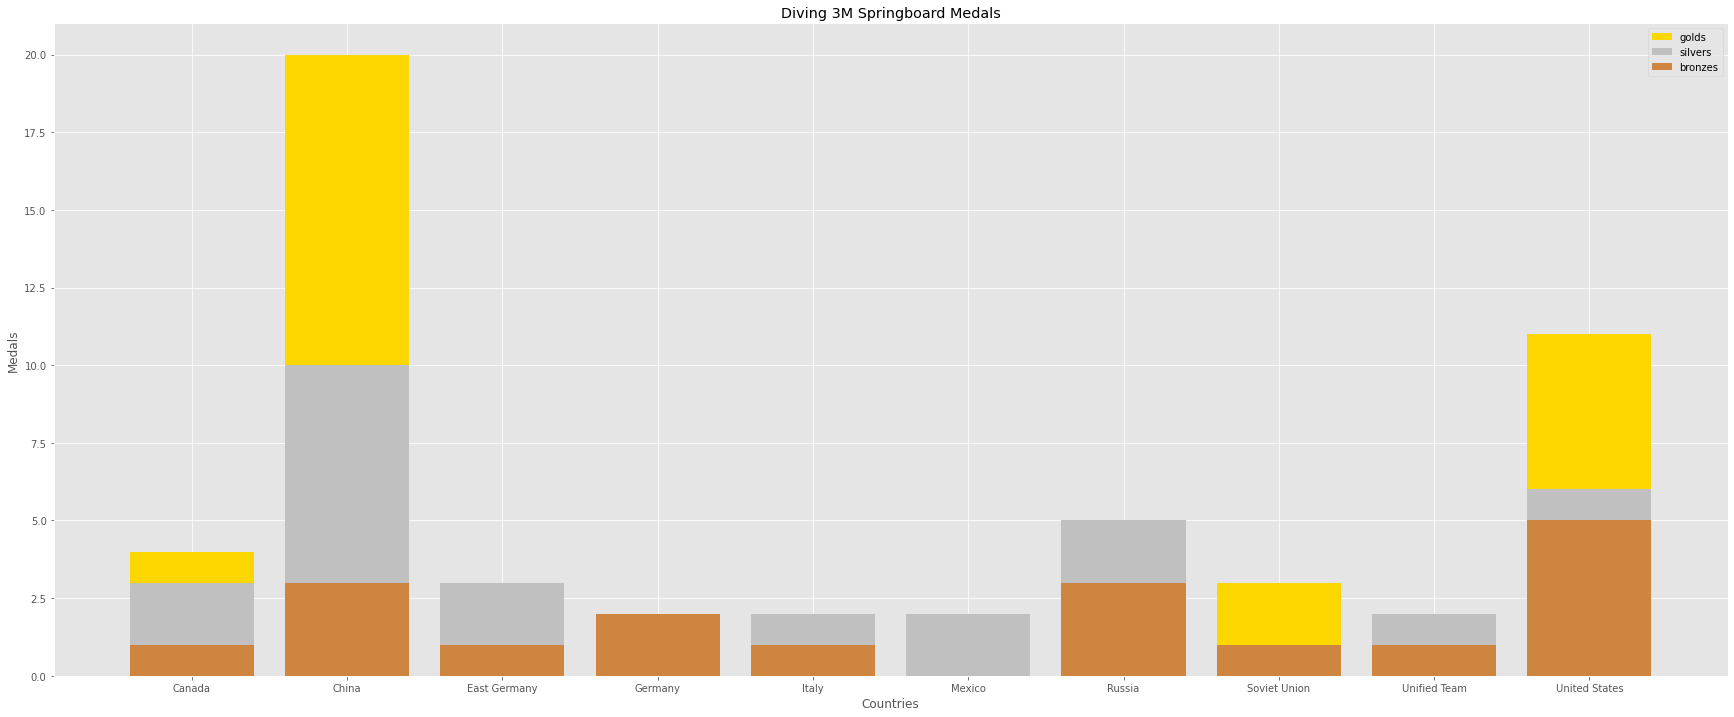

In [210]:
goldD3RS = goldD3S [ 0:len(goldD3S) ] [::-1]
silverD3RS = silverD3S [ 0:len(silverD3S) ] [::-1]
bronzeD3RS = bronzeD3S [ 0:len(bronzeD3S) ] [::-1]
plotTogetherLists(goldD3RS,silverD3RS,bronzeD3RS, "Diving 3M Springboard Medals")

In [184]:
diving10 = open('../data/diving10.txt','r')
(goldD10S, bronzeD10S, silverD10S) = readData(diving10)

China	8
United States	3
East Germany	2
Australia	2
Soviet Union	1
Italy	1
Russia	1


United States	5
China	5
Soviet Union	3
Russia	2
Mexico	1
Canada	1
Australia	1


United States	5
China	5
Soviet Union	2
Germany	2
Sweden	1
Unified Team	1
Australia	1
Canada	1




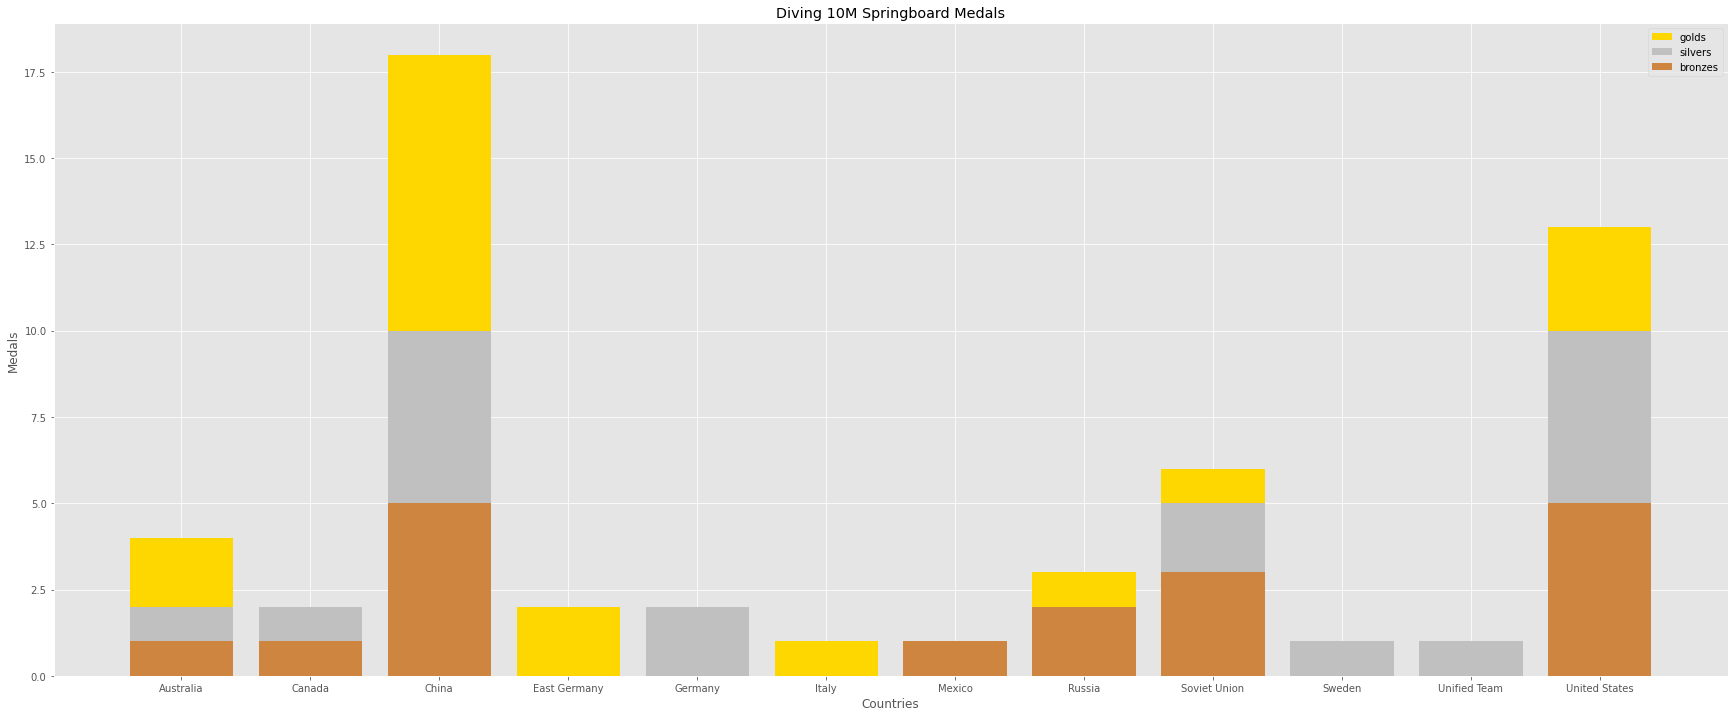

In [211]:
goldD10RS = goldD10S [ 0:len(goldD10S) ] [::-1]
silverD10RS = silverD10S [ 0:len(silverD10S) ] [::-1]
bronzeD10RS = bronzeD10S [ 0:len(bronzeD10S) ] [::-1]
plotTogetherLists(goldD10RS,silverD10RS,bronzeD10RS, "Diving 10M Springboard Medals")

In [186]:
gymnastics = open('../data/gymnastics.txt','r')
(goldGS, bronzeGS, silverGS) = readData(gymnastics)

Romania	6
Soviet Union	4
China	3
East Germany	1
Ukraine	1
Greece	1
Russia	1
Latvia	1
Canada	1


United States	5
Romania	3
Bulgaria	3
Soviet Union	2
Japan	2
Russia	2
East Germany	1
France	1
China	1
Unified Team	1
Spain	1


Soviet Union	5
Romania	3
United States	2
China	2
Russia	2
Hungary	1
Japan	1
Unified Team	1
Spain	1




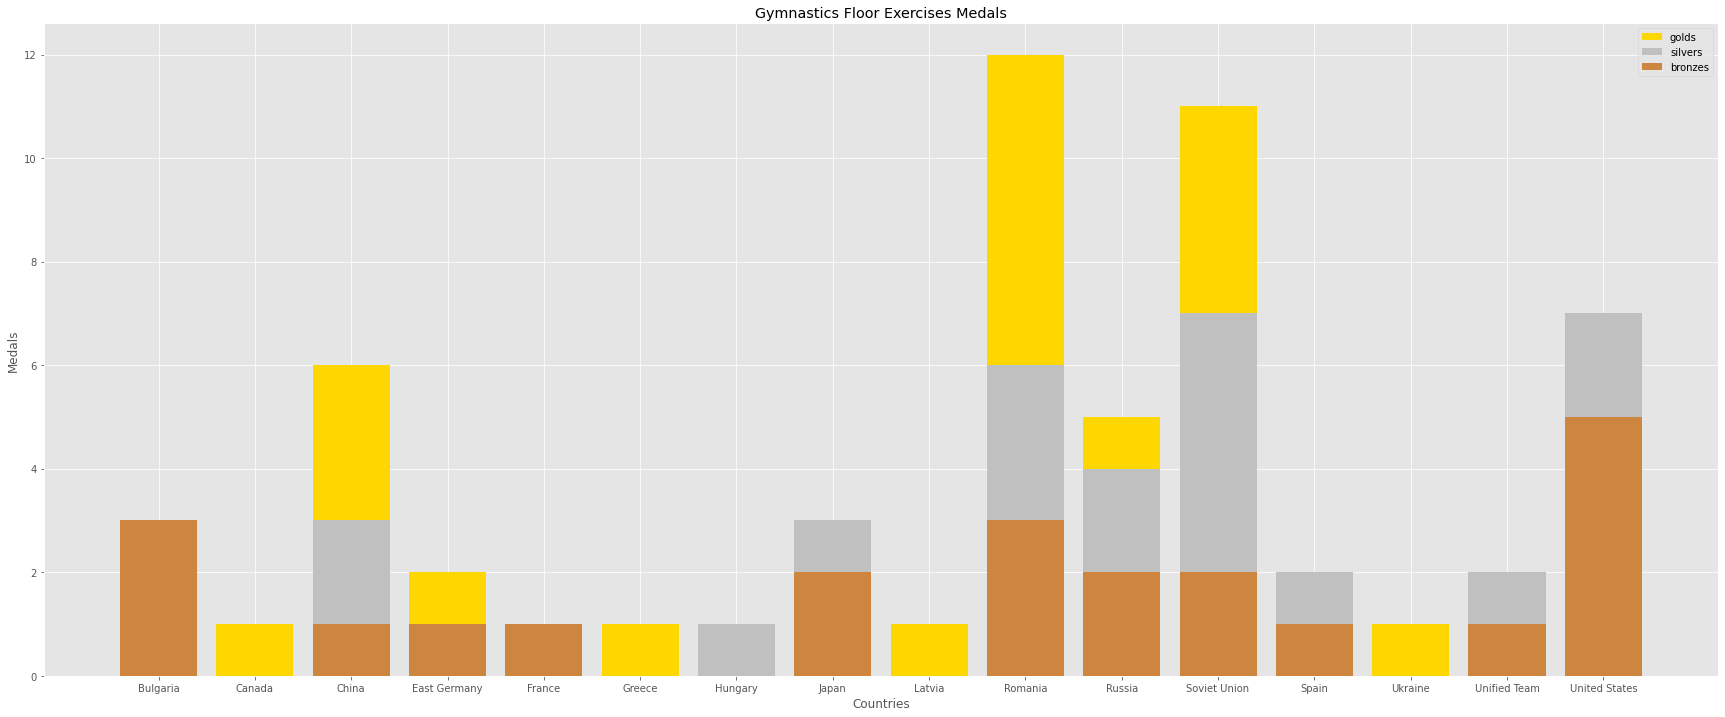

In [212]:
goldGRS = goldGS [ 0:len(goldGS) ] [::-1]
silverGRS = silverGS [ 0:len(silverGS) ] [::-1]
bronzeGRS = bronzeGS [ 0:len(bronzeGS) ] [::-1]
plotTogetherLists(goldGRS,silverGRS,bronzeGRS, "Gymnastics Floor Exercises Medals")

In [188]:
hockey = open('../data/hockey.txt','r')
(goldHS, bronzeHS, silverHS) = readData(hockey)

Netherlands	64
Australia	64
Germany	49
New Zealand	16
India	16
Zimbabwe	16
Pakistan	16
United Kingdom	16
Spain	16


Netherlands	64
Australia	49
Pakistan	32
Soviet Union	32
United Kingdom	32
Argentina	32
United States	16
Germany	16


Spain	48
West Germany	48
South Korea	48
Australia	32
Netherlands	31
Czechoslovakia	16
Germany	16
Argentina	16
China	16




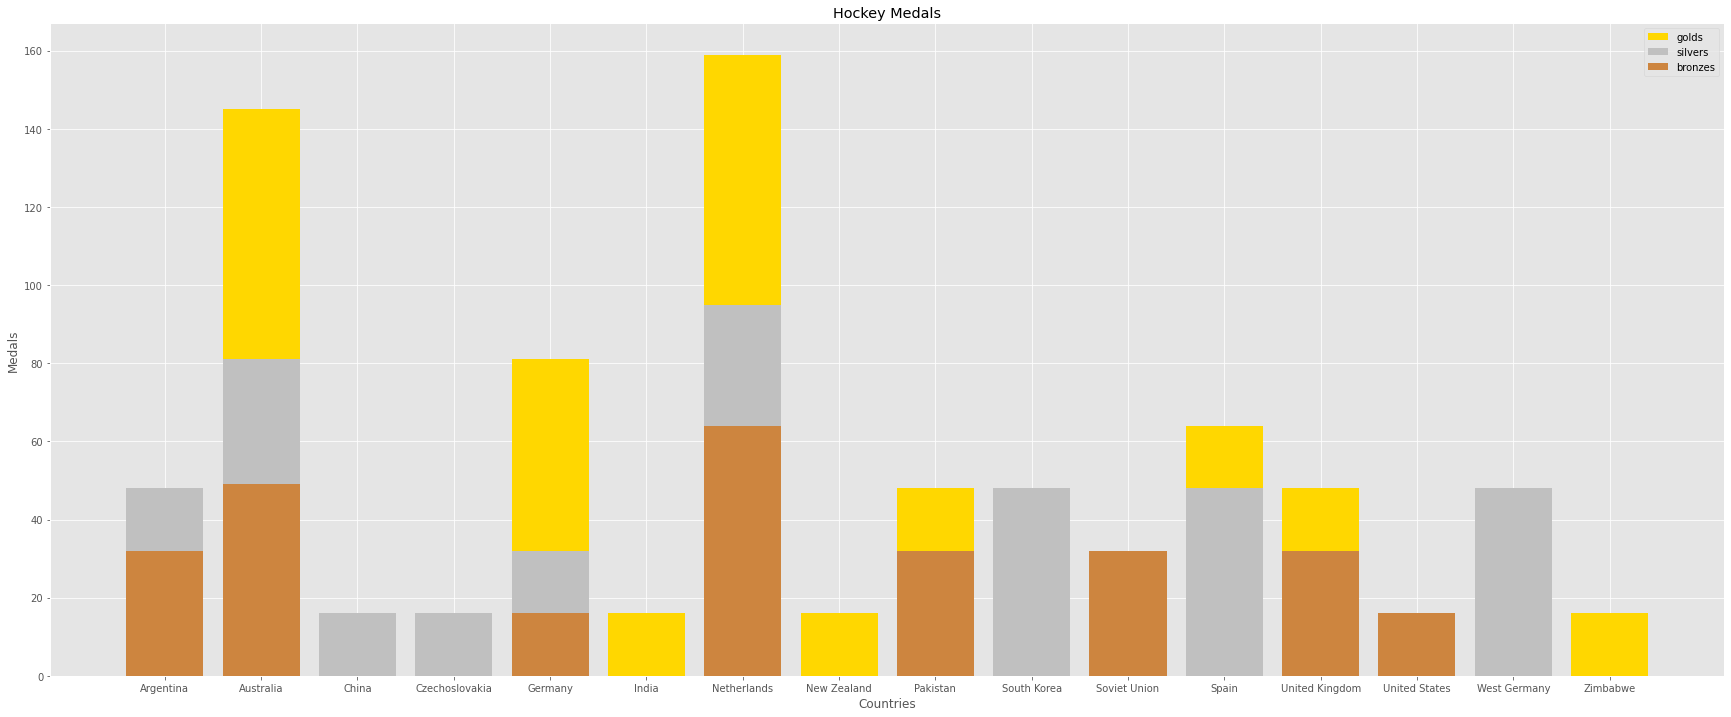

In [213]:
goldHRS = goldHS [ 0:len(goldHS) ] [::-1]
silverHRS = silverHS [ 0:len(silverHS) ] [::-1]
bronzeHRS = bronzeHS [ 0:len(bronzeHS) ] [::-1]
plotTogetherLists(goldHRS,silverHRS,bronzeHRS, "Hockey Medals")

In [110]:
volleyball = open('../data/volleyball.txt','r')
(goldVS, bronzeVS, silverVS) = readData(volleyball)

United States	46
Brazil	40
Soviet Union	36
Cuba	36
China	24
Poland	12
Japan	12
Netherlands	12
Yugoslavia	12
Australia	2


Brazil	28
China	26
United States	26
Cuba	24
Italy	24
Russia	24
South Korea	12
Bulgaria	12
Romania	12
Japan	12
Argentina	12
Yugoslavia	12
Canada	2
Australia	2
Germany	2
Switzerland	2


Soviet Union	36
Russia	36
Brazil	34
United States	26
Italy	23
China	14
Bulgaria	12
East Germany	12
Peru	12
Netherlands	12
Unified Team	12
Spain	2




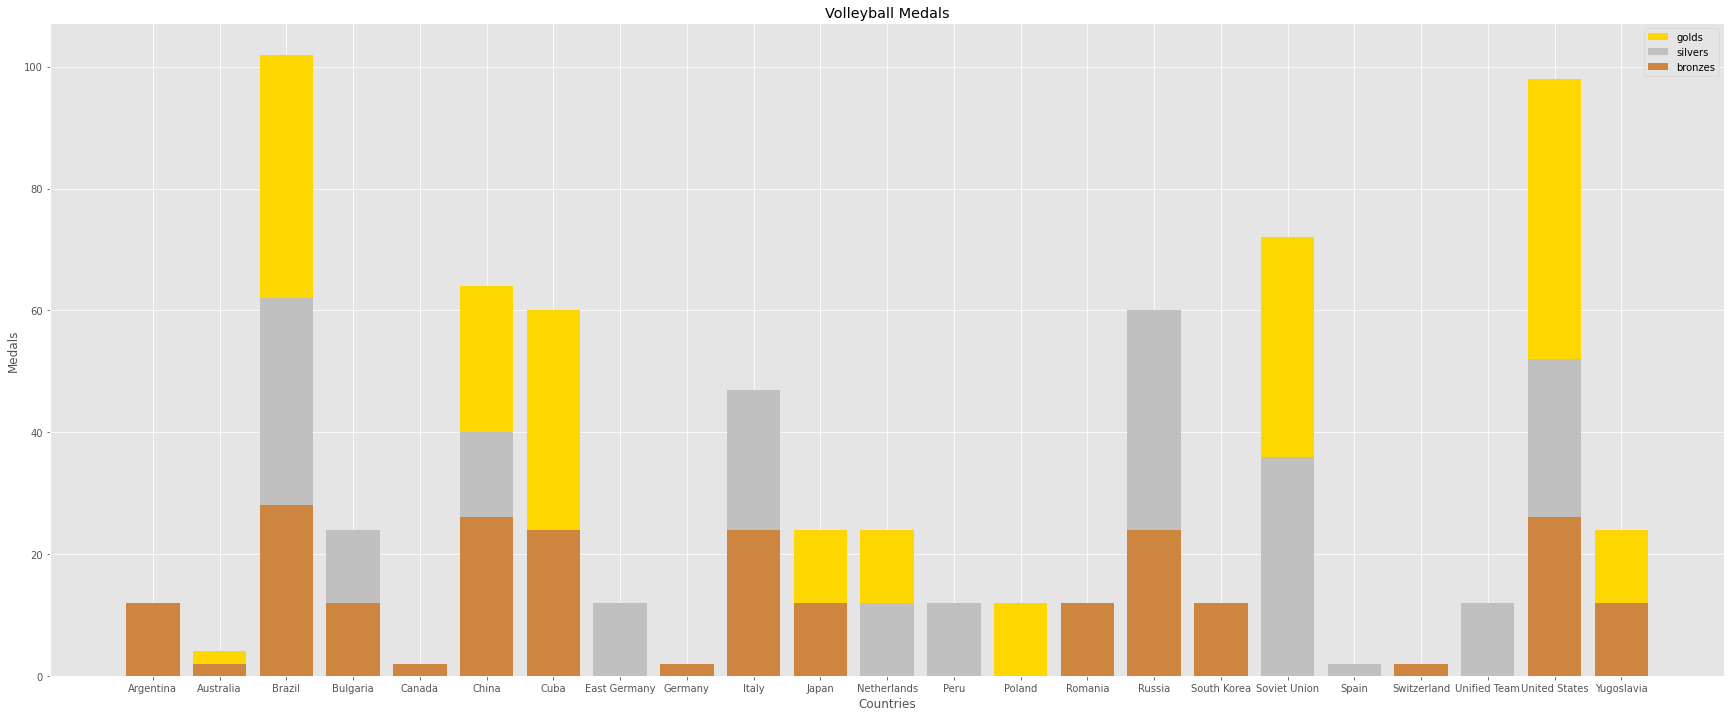

In [214]:
goldVRS = goldVS [ 0:len(goldVS) ] [::-1]
silverVRS = silverVS [ 0:len(silverVS) ] [::-1]
bronzeVRS = bronzeVS [ 0:len(bronzeVS) ] [::-1]
plotTogetherLists(goldVRS,silverVRS,bronzeVRS, "Volleyball Medals")

In [103]:
def CalculateScore(gold, silver, bronze):
    score = {}
    for x in gold:
        if x[0] in score: score [x[0]] = score [x[0]] + (x[1] * 3)
        else:  score [x[0]] = x[1] * 3      

    for x in silver:
        if x[0] in score: score [x[0]] = score [x[0]] + (x[1] * 2)
        else:  scoreV [x[0]] = x[1] * 2 

    for x in bronze:
        if x[0] in score: score [x[0]] = score [x[0]] + (x[1])
        else:  score [x[0]] = x[1]

    Score = sorted (score.items(), key = operator.itemgetter(1), reverse=True)

    for i in range(0,len(Score),1):
        print (Score[i][0]+"\t"+str(Score[i][1]))
    print("\n")
    return Score
    
print("Archery Scores")
ScoreA = CalculateScore(goldAS, silverAS, bronzeAS)

Archery Scores
South Korea	39
United States	19
Soviet Union	11
China	7
Italy	5
Finland	4
Australia	4
Ukraine	4
France	3
United Kingdom	2
Japan	1
Unified Team	1
Netherlands	1
Russia	1




In [104]:
print("Diving 3M Springboard Scores")
ScoreD3 = CalculateScore(goldD3S, silverD3S, bronzeD3S)

Diving 3M Springboard Scores
China	47
United States	22
Canada	8
Soviet Union	7
Russia	3
Germany	2
East Germany	1
Italy	1
Unified Team	1




In [105]:
print("Diving 10M Springboard Scores")
ScoreD10 = CalculateScore(goldD10S, silverD10S, bronzeD10S)

Diving 10M Springboard Scores
China	39
United States	24
Soviet Union	10
Australia	9
East Germany	6
Russia	5
Italy	3
Mexico	1
Canada	1




In [106]:
print("Gymnastics Floor Exercises Scores")
ScoreG = CalculateScore(goldGS, silverGS, bronzeGS)

Gymnastics Floor Exercises Scores
Romania	27
Soviet Union	24
China	14
Russia	9
United States	5
East Germany	4
Ukraine	3
Greece	3
Latvia	3
Canada	3
Bulgaria	3
Japan	2
France	1
Unified Team	1
Spain	1




In [107]:
print("Hockey Scores")
ScoreH = CalculateScore(goldHS, silverHS, bronzeHS)

Hockey Scores
Netherlands	318
Australia	305
Germany	195
Spain	144
Pakistan	80
United Kingdom	80
New Zealand	48
India	48
Zimbabwe	48
Soviet Union	32
Argentina	32
United States	16




In [113]:
print("Volleyball Scores")
ScoreV = CalculateScore(goldVS, silverVS, bronzeVS)

Volleyball Scores
United States	216
Brazil	216
Soviet Union	180
Cuba	132
China	126
Netherlands	60
Japan	48
Yugoslavia	48
Poland	36
Italy	24
Russia	24
South Korea	12
Bulgaria	12
Romania	12
Argentina	12
Australia	8
Canada	2
Germany	2
Switzerland	2




In [154]:
weather = open('../data/weathertest.txt','r')
dataWeather = weather.readlines()

dataW = {}
for x in dataWeather:
    temp = x.split()
    if(len(temp) != 2):
        temp2 = temp[0] + " " + temp[1]
        dataW[temp2] = temp[len(temp)-1]
    else:
        dataW[temp[0]] = temp[len(temp)-1]
    
dataWA = {}
for x in ScoreA:
    dataWA[x[0]] = dataW[x[0]]
    
dataWD3 = {}
for x in ScoreD3:
    dataWD3[x[0]] = dataW[x[0]]
    
dataWD10 = {}
for x in ScoreD10:
    dataWD10[x[0]] = dataW[x[0]]
    
dataWG = {}
for x in ScoreG:
    dataWG[x[0]] = dataW[x[0]]
    
dataWH = {}
for x in ScoreH:
    dataWH[x[0]] = dataW[x[0]]
    
dataWV = {}
for x in ScoreV:
    dataWV[x[0]] = dataW[x[0]]

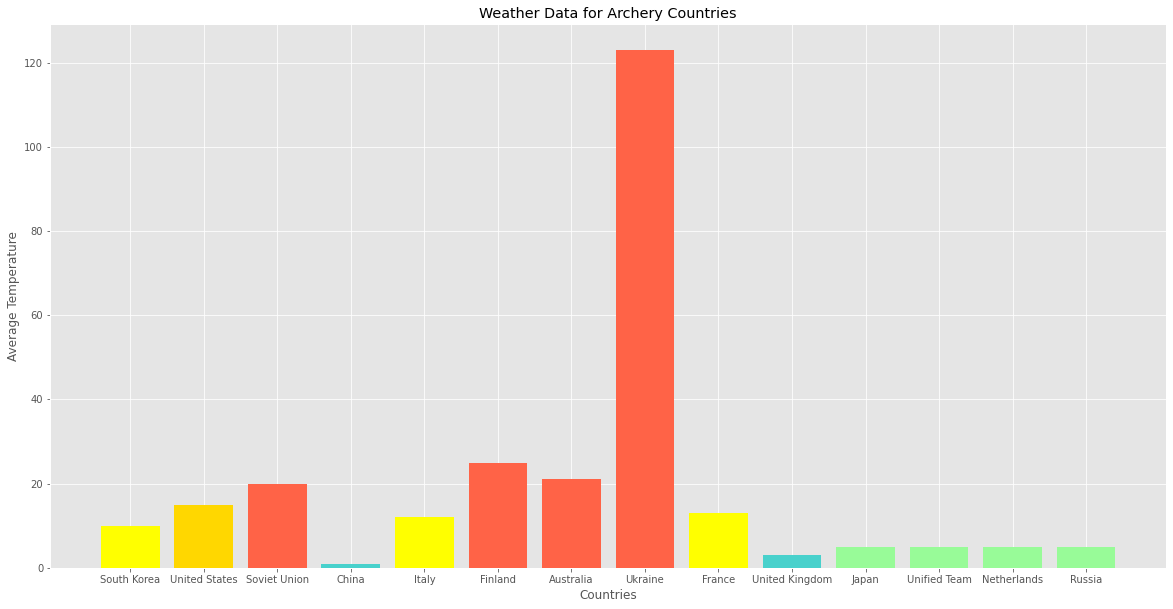

In [157]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

def plotOneList (score, title):
    plt.style.use('ggplot')
    plt.figure(figsize=(20,10)) 
    
    x = list(score.keys())
    y = []
    for item in score:
        y.append(int(score.get(item)))
        
    colors = []
    for item in score:
        if(int(score.get(item)) >= 20):
            colors.append('tomato')
        if(int(score.get(item)) < 20 and int(score.get(item)) >= 15):
            colors.append('gold')
        if(int(score.get(item)) < 15 and int(score.get(item)) >= 10):
            colors.append('yellow')
        if(int(score.get(item)) < 10 and int(score.get(item)) >= 5):
            colors.append('palegreen')
        if(int(score.get(item)) < 5 and int(score.get(item)) > 0):
            colors.append('mediumturquoise')
            
    
    x_pos = [i for i, _ in enumerate(x)]

    plt.bar(x_pos, y, color = colors)
    plt.xlabel("Countries")
    plt.ylabel("Average Temperature")
    plt.title(title)

    plt.xticks(x_pos, x)

    plt.show()
    
plotOneList(dataWA, "Weather Data for Archery Countries")

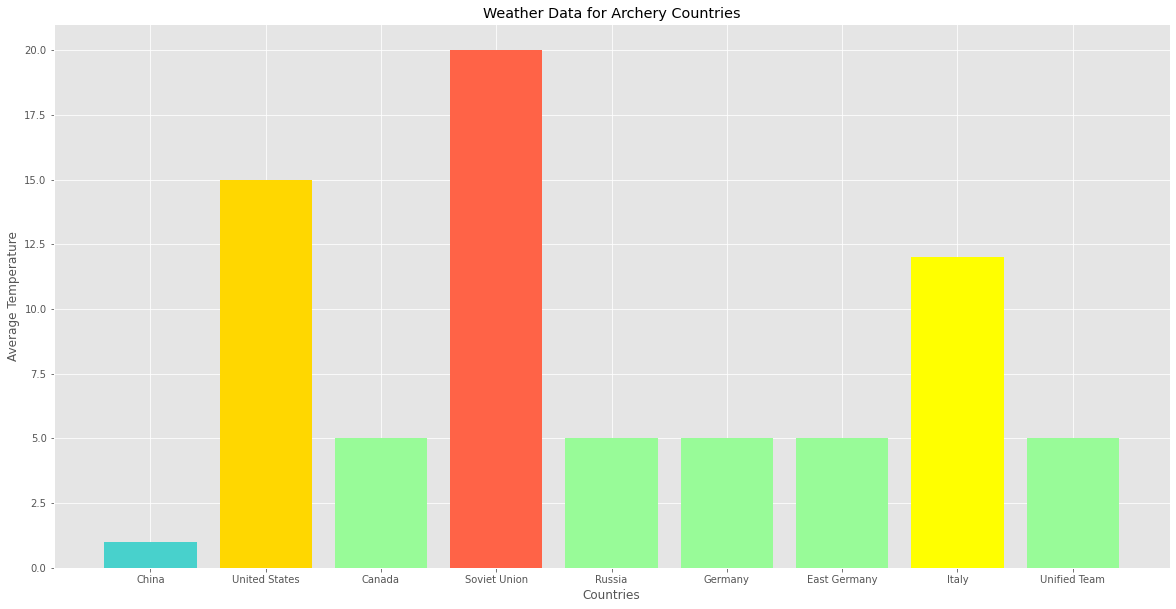

In [158]:
plotOneList(dataWD3, "Weather Data for Archery Countries")

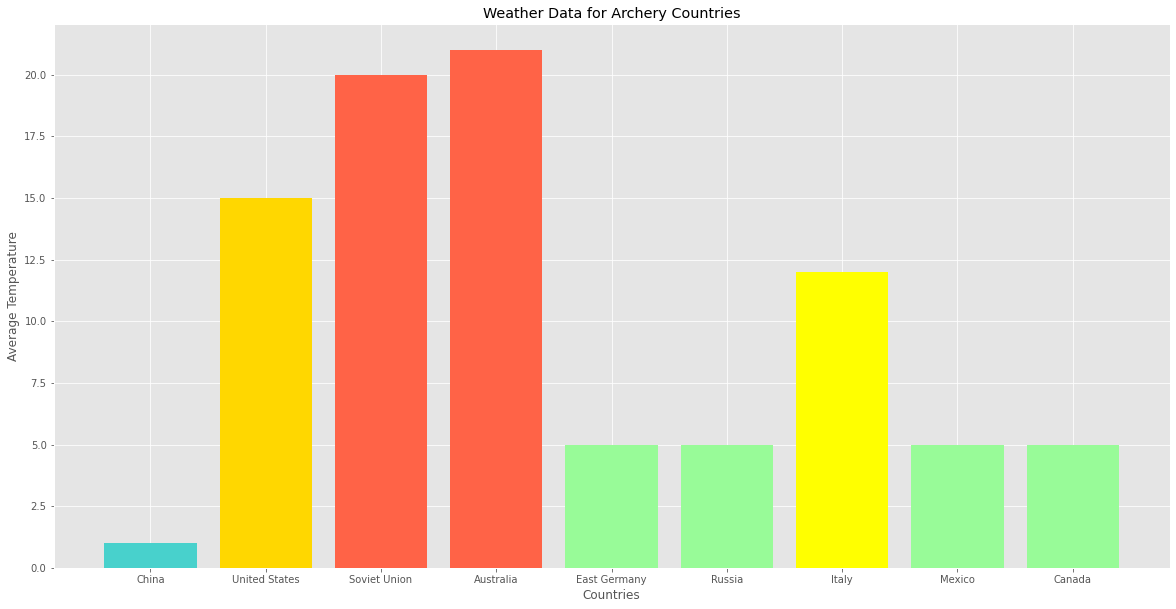

In [159]:
plotOneList(dataWD10, "Weather Data for Archery Countries")

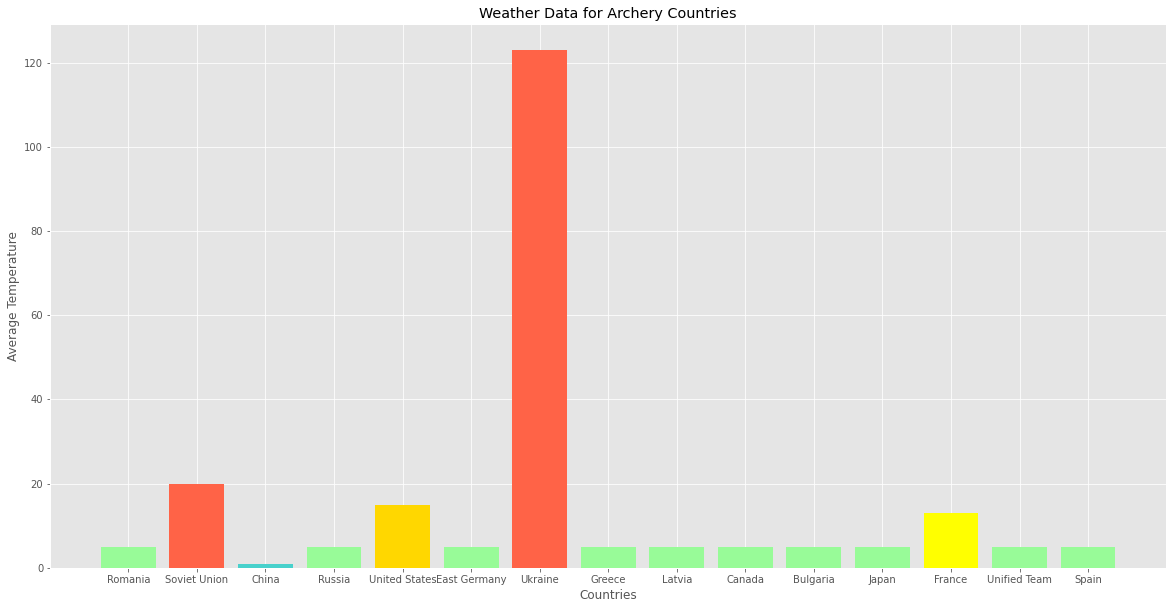

In [160]:
plotOneList(dataWG, "Weather Data for Archery Countries")

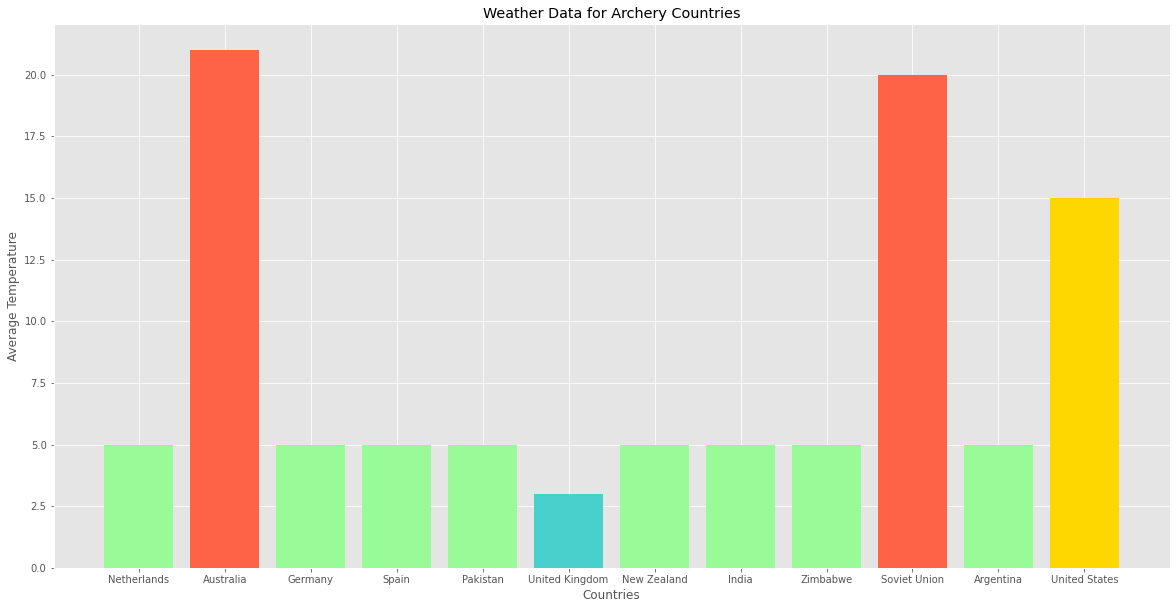

In [161]:
plotOneList(dataWH, "Weather Data for Archery Countries")

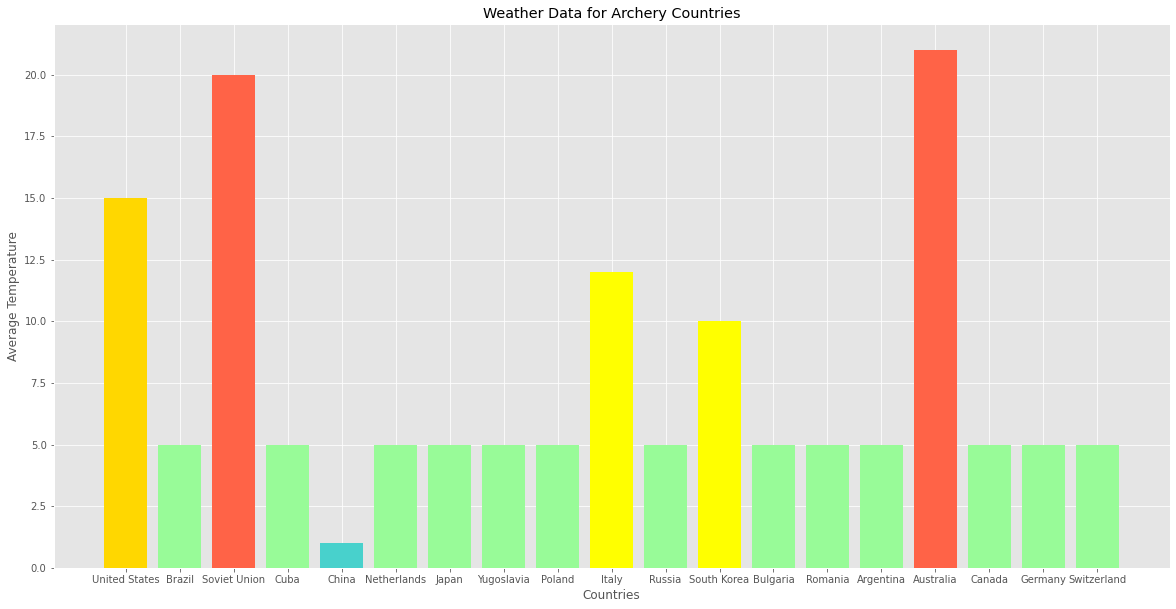

In [162]:
plotOneList(dataWV, "Weather Data for Archery Countries")